In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

In [3]:
from fling import utilities as ut
from fling import tfidfModule as tfm

#change operating folder      
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/scripts/")
#read the .csv data file using the dataProcessor class
rp = tfm.dataProcessor("../datasets/DataAnalyst.csv")

                                  Job Description  Company Name
Industry                                                       
-1                                            353           352
IT Services                                   325           325
Staffing & Outsourcing                        323           323
Health Care Services & Hospitals              151           151
Consulting                                    111           111
...                                           ...           ...
Chemical Manufacturing                          1             1
Pet & Pet Supplies Stores                       1             1
Consumer Product Rental                         1             1
Metals Brokers                                  1             1
News Outlet                                     1             1

[89 rows x 2 columns]


In [4]:
#create a flingTFIDF object around the pre-processed daa
ftf = tfm.flingTFIDF(rp.dataInitialSmall,'Job Description')

# tokenization, customizable
ftf.smartTokenizeColumn()

# get Term Frequency of each document, and store add it as an object, in a new column
ftf.getTF()

# compute Inverse Document Frequencies across the entire vocabulary
ftf.computeIDFmatrix()

# get TFIDF, and store it as a new column in data, tf-idf
ftf.getTFIDF()

# compute sum of all tf-idf values and add it as a new column
ftf.createDistanceMetadata()

[ ================================================== ] 100.00%
Adding term frequency column based on stopsRemoved
[ ================================================== ] 100.00%
Computing list of words for IDF...

Created list of terms for IDF matrix with 27075  terms.

Computing global IDF matrix...

[ ================================================== ] 100.00%
Computing and adding TF-IDF column based on stopsRemoved
[ ================================================== ] 100.00%

In [10]:
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/scripts/")
ftf.data.to_pickle('../processFiles/data_tfidf_processed.pkl')
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/")

In [11]:
# load dataset with tf-idf vectors and load pretrained GloVe word vectors
from fling import flingPretrained as pre
import pandas as pd


dataProcessed = pd.read_pickle('processFiles/data_tfidf_processed.pkl')
os.chdir("/Users/arnabborah/Documents/repositories/textclusteringDBSCAN/scripts/")
fdb = pre.flingPretrained(dataProcessed)
fdb.loadPretrainedWordVectors('glove')

# adding glove vectors for every document
fdb.addDocumentGloveVector()


DBSCAN initialized!

Loading Glove Model

400000  words loaded!

GloVe Vectors Loaded!




flingDBSCAN initialized!

computing best distance
[ ================================================== ] 100.00%

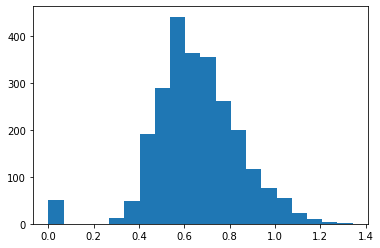


Best epsilon computed on GLOVE = 0.6544420699360174 


initiating DBSCAN Clustering with glove vectors

[                                                    ] 0.04%
 ----  cluster_1_ assigned to 565 points! ----
[                                                    ] 0.09%
 ----  cluster_2_ assigned to 855 points! ----
[                                                    ] 0.18%
 ----  cluster_3_ assigned to 58 points! ----
[                                                    ] 0.31%
 ----  cluster_4_ assigned to 119 points! ----
[                                                    ] 0.53%
 ----  cluster_5_ assigned to 109 points! ----
[                                                    ] 1.07%
 ----  cluster_6_ assigned to 53 points! ----
[                                                    ] 1.91%
 ----  cluster_7_ assigned to 37 points! ----
[ =                                                  ] 2.26%
 ----  cluster_8_ assigned to 55 points! ----
[ ===                              

In [12]:
# use DBSCAN clustering on the glove vectors loaded in the previos
from fling import flingDBSCAN as fdbscan

fdbscan1 = fdbscan.flingDBSCAN(fdb.data,None,25,'glove')
fdbscan1.dbscanCompute()
fdbscan1.addClusterLabel('glove-clusterID')
fdbscan1.printClusterInfo()


flingDBSCAN initialized!

computing best distance
[ ================================================== ] 100.00%

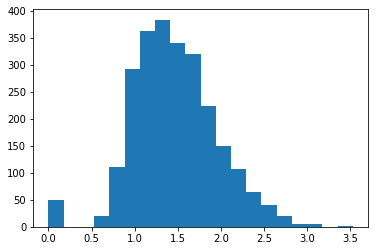


Best epsilon computed on GLOVE-TFIDF = 1.4628292329952732 


initiating DBSCAN Clustering with tfidf vectors

[                                                    ] 0.04%
 ----  cluster_1_ assigned to 810 points! ----
[                                                    ] 0.09%
 ----  cluster_2_ assigned to 695 points! ----
[                                                    ] 0.31%
 ----  cluster_3_ assigned to 61 points! ----
[                                                    ] 0.93%
 ----  cluster_4_ assigned to 347 points! ----
[ =                                                  ] 3.86%
 ----  cluster_5_ assigned to 26 points! ----
[ =============                                      ] 26.14%
 ----  cluster_6_ assigned to 44 points! ----
[ ================                                   ] 32.45%
 ----  cluster_7_ assigned to 27 points! ----
[ ================================================== ] 100.00%
 7 clusters formed!
Cluster characteristics:
 -- vectors: tfidf
 -- minP

In [13]:
# converting tf-idf into vectors
fdb.tfidf2vec('tf-only')
fdb.tfidf2vec('tf-idf')

# clustering documents based on 
fdbscan2 = fdbscan.flingDBSCAN(fdb.data,None,25,'tfidf')
fdbscan2.dbscanCompute()
fdbscan2.addClusterLabel('tfidf-clusterID')
fdbscan2.printClusterInfo() 

In [52]:
temp = fdb.data.drop(columns=['tfMatrix','sumTFIDF','glove-vector','tfidf2vec-tf','tfidf2vec-tfidf','stopsRemoved'])
temp['glove-clusterID'].fillna("_clusterX_",inplace=True)
temp['tfidf-clusterID'].fillna("_clusterX_",inplace=True)

In [53]:
temp

,Job Description,Company Name,Industry,glove-clusterID,tfidf-clusterID
0,Are you eager to roll up your sleeves and harn...,Vera Institute of Justice\n3.2,Social Assistance,cluster_0_,cluster_0_
1,Overview\n\nProvides analytical and technical ...,Visiting Nurse Service of New York\n3.8,Health Care Services & Hospitals,cluster_1_,cluster_1_
2,Weâre looking for a Senior Data Analyst who ...,Squarespace\n3.4,Internet,cluster_2_,cluster_2_
3,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,Celerity\n4.1,IT Services,cluster_2_,cluster_2_
4,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,FanDuel\n3.9,Sports & Recreation,cluster_3_,_clusterX_
...,...,...,...,...,...
2248,Maintains systems to protect data from unautho...,"Avacend, Inc.\n2.5",Staffing & Outsourcing,_clusterX_,cluster_4_
2249,Position:\nSenior Data Analyst (Corporate Audi...,Arrow Electronics\n2.9,Wholesale,cluster_1_,cluster_1_
2250,"Title: Technical Business Analyst (SQL, Data a...",Spiceorb,-1,cluster_2_,cluster_2_
2251,Summary\n\nResponsible for working cross-funct...,Contingent Network Services\n3.1,Enterprise Software & Network Solutions,cluster_2_,cluster_1_


In [54]:
from sklearn import svm, preprocessing
from sklearn.model_selection import train_test_split

le = preprocessing.LabelEncoder()
le.fit(temp['glove-clusterID'])
tempZ = le.transform(temp['glove-clusterID'])
temp['glove-clusterID'] = tempZ

le.fit(temp['tfidf-clusterID'])
tempZ = le.transform(temp['tfidf-clusterID'])
temp['tfidf-clusterID'] = tempZ

X = temp.drop(columns=['Industry'])
y = temp['Industry']
trainX = X[:1750]
testX = X[1751:]
train_y = y[:1750]
test_y = y[1751:]

In [56]:
clf = svm.SVC(kernel='linear')
clf.fit(trainX,train_y)

ValueError: could not convert string to float: "Are you eager to roll up your sleeves and harness data to drive policy change? Do you enjoy sifting through complex datasets to illuminate trends and insights? Do you see yourself working for a values-driven organization with a vision to tackle the most pressing injustices of our day?\n\nWe are looking to hire a bright, hard-working, and creative individual with strong data management skills and a demonstrated commitment to immigrant's rights. The Data Analyst will assist with analysis and reporting needs for Veras Center on Immigration and Justice (CIJ), working across its current projects and future Vera initiatives.\n\nWho we are:\n\nFounded in 1961, The Vera Institute is an independent, non-partisan, nonprofit organization that combines expertise in research, technical assistance, and demonstration projects to assist leaders in government and civil society examine justice policy and practice, and improve the systems people rely on for justice and safety.\nWe study problems that impede human dignity and justice.\nWe pilot solutions that are at once transformative and achievable.\nWe engage diverse communities in informed debate.\nAnd we harness the power of evidence to drive effective policy and practice\nWhat were doing:\n\nWe are helping to build a movementamong government leaders, advocates, and the immigration legal services communitytowards universal legal representation for immigrants facing deportation. In the face of stepped-up immigration enforcement, millions of non-citizens are at risk of extended detention and permanent separation from their families and communities. Veras Center on Immigration and Justice (CIJ) partners with government, non-profit partners, and communities to improve government systems that affect immigrants and their families. CIJ administers several nationwide legal services programs for immigrants facing deportation, develops and implements pilot programs, provides technical assistance, and conducts independent research and evaluation.\n\nThats where you come in:\nThe Data Analyst will support the Centers programmatic efforts through regular monitoring and reporting of federal government and subcontractor data. CIJ manages several proprietary databases that run on AWS and Caspio and uses SQL, R, and Python to manage data. This is an opportunity to help shape an innovative national research and policy agenda as part of a dedicated team of experts working to improve access to justice for non-citizens.\n\nVera seeks to hire a Data Analyst to work on various data management projects with its Center on Immigration and Justice (CIJ). In collaboration with other Data Analysts, this position will involve work across several projects, such as the Unaccompanied Childrens Program (UCP), a program to increase legal representation for immigrant children facing deportation without a parent or legal guardian. The position may cover additional duties for the Legal Orientation Program for Custodians (LOPC), which educates the custodians of unaccompanied children about their rights and the immigration court process.\n\nAbout the role:\n\nAs a Data Analyst, you will report to a member of the research team and work in close collaboration with other Vera staff on ongoing database management, monitoring, reporting, and analysis projects. Youll support the team by taking ownership of ongoing monitoring and reporting tasks involving large data sets. Other principal responsibilities will include:\nSupporting research staff by preparing large datasets for analysis, including merging, cleaning, and recoding data;\nProviding insights into program performance through summary statistics and performance indicators;\nProducing timely reports on Vera projects for team members and stakeholders;\nImproving recurring reporting processes by optimizing code and producing subsequent documentation;\nCoordinating database management tasks such as participating in new database design, modifying existing databases, and communicating with outside engineers and subcontractors;\nDeveloping codebooks and delivering user trainings through webinars and database guides;\nBuilding and maintaining interactive dashboards;\nDocumenting and correcting data quality issues;\nWorking with supervisors to prioritize program needs;\nAssisting on other projects and tasks as assigned.\nAbout you:\n\nYoure committed to improving issues affecting immigrants in the United States. Applicants with personal experiences with the immigration system are especially encouraged to apply.\n\nYoure just getting started in your career and have 1 2 years of professional or internship experience working with large datasets and preparing data for analysis.\n\nYou have a real enthusiasm for working with data.\n\nYou are comfortable writing queries in SQL, R, and/or Python, or have a solid foundation coding in other programming languages used to manipulate data. Experience working collaboratively using tools like Git/GitHub is a plus.\n\nYou have exceptional attention to detail, strong problem-solving ability and logical reasoning skills, and the ability to detect anomalies in data.\n\nYoure able to work on multiple projects effectively and efficiently, both independently and collaboratively with a team.\n\nThis position involves working with secure data that may require government security clearance. That clearance is restricted to U.S. citizens and citizens of countries that are party to collective defense agreements with the U.S. The list of those countries is detailed on this webpage. An additional requirement of that clearance is residence in the United States for at least three of the last five years.\n\nHow to apply:\n\nPlease submit cover letter and resume. Applications will be considered on a rolling basis until position is filled. Online submission in PDF format is preferred. Applications with no cover letter attached will not be considered. The cover letter should address your interest in CIJ and this position.\n\nHowever, if necessary, materials may be mailed or faxed to\n\nATTN: Human Resources / CIJ Data Analyst Recruitment\n\nVera Institute of Justice\n\n34 35th St, Suite 4-2A\n\nBrooklyn, NY 11232\n\nFax: (212) 941-9407\n\nPlease use only one method (online, mail or fax) of submission.\n\nNo phone calls, please. Only applicants selected for interviews will be contacted.\n\nVera is an equal opportunity/affirmative action employer. All qualified applicants will be considered for employment without unlawful discrimination based on race, color, creed, national origin, sex, age, disability, marital status, sexual orientation, military status, prior record of arrest or conviction, citizenship status, current employment status, or caregiver status.\n\nVera works to advance justice, particularly racial justice, in an increasingly multicultural country and globally connected world. We value diverse experiences, including with regard to educational background and justice system contact, and depend on a diverse staff to carry out our mission.\n\nFor more information about Vera and CIJs work, please visit www.vera.org.\n\nPowered by JazzHR"